<a href="https://colab.research.google.com/github/ulissigroup/math-methods-chemical-engineering/blob/master/lecture_notes/26-nonlinear-regression-course-recap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
$$\newcommand{\arr}[1]{\underline{\underline{#1}}}$$    
$$\newcommand{\vec}[1]{\underline{#1}}$$   
$$\require{mhchem}$$


# Recap on linear regression

Last class, we talked about how we could turn linear regression into a linear algebra problem
- You can calculate this yourself
- You can also do linear regression using statistical packages like statsmodel

Today we will discuss two ways of solving non-linear regression problems
- Turn a non-linear problem into a linear one and solve
- Non-linear curve fitting


## Turn a non-linear regression problem into a linear regression problem



-   Rate constants and reaction orders are determined by using models that are fit to experimental data
-   A common case is to monitor concentration vs. time in a constant volume, batch reactor
-   We consider the disappearance of $A$
-   From the mole balance we know:

\begin{equation}
\frac{dN_A}{dt} = r_A V
\end{equation}

-   Let us assume the rate law is of the form: $r_A = k C_A^\alpha$ and a constant volume so that:

\begin{equation}
\frac{dC_A}{dt} = -k C_A^\alpha
\end{equation}

-   Let us be loose with mathematics, rearrange the equation, and take the log of both sides.
    -   By loose I mean we take logs of quantities that are not dimensionless

\begin{equation}
\ln(-\frac{dC_A}{dt}) = \ln{k} + \alpha \ln C_A
\end{equation}

-   This suggests that if we could numerically compute $\frac{dC_A}{dt}$ from our data of $C_A(t)$ then a plot of the log of the negative derivative vs the log of concentration would have
    -   an intercept equal to the log of the rate constant, $k$
    -   and a slope equal to the reaction order $\alpha$

-   Given the following data, determine the reaction order in A and the rate constant with 95% confidence intervals.

<table id="orgfd5ae74" border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-right" />

<col  class="org-right" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-right">time (min)</th>
<th scope="col" class="org-right">C\_A (mol/L)</th>
</tr>
</thead>

<tbody>
<tr>
<td class="org-right">0</td>
<td class="org-right">0.0500</td>
</tr>


<tr>
<td class="org-right">50</td>
<td class="org-right">0.0380</td>
</tr>


<tr>
<td class="org-right">100</td>
<td class="org-right">0.0306</td>
</tr>


<tr>
<td class="org-right">150</td>
<td class="org-right">0.0256</td>
</tr>


<tr>
<td class="org-right">200</td>
<td class="org-right">0.0222</td>
</tr>


<tr>
<td class="org-right">250</td>
<td class="org-right">0.0195</td>
</tr>


<tr>
<td class="org-right">300</td>
<td class="org-right">0.0174</td>
</tr>
</tbody>
</table>


- We can get the derivatives by first fitting a spline through the data. The spline is essentially just a smoothing function  
-   We will use the `splev` function to numerically compute derivatives from spline fits of the function. 
-   This works best when the $x$ points are evenly spaced, and they should be monotically increasing or decreasing


Text(0, 0.5, 'Conc. [mol/L]')

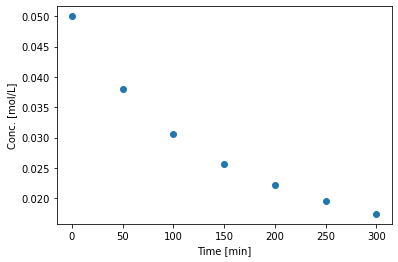

In [0]:
data=np.array([[0,0.05],
               [50,.038],
               [100,.0306],
               [150,.0256],
               [200,.0222],
               [250,.0195],
               [300,.0174]])

plt.plot(data[:,0],data[:,1],'o')
plt.xlabel('Time [min]')
plt.ylabel('Conc. [mol/L]')

So, we need to convert the list of numbers to a numpy array so we can do the analysis.



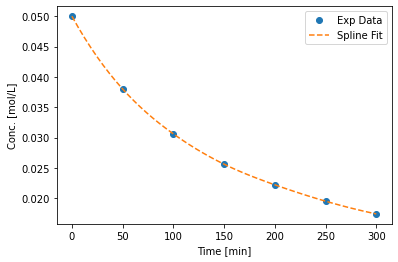

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# data will be a 2d list, which we convert to an array here
data = np.array(data)
t = data[:, 0]   # column 0
Ca = data[:, 1]  # column 1

# calculate a spline through the data
tck = interpolate.splrep(t, Ca)

t_eval = np.linspace(0,300)
Ca_spline = interpolate.splev(t_eval, tck)
plt.plot(data[:,0],data[:,1],'o', label='Exp Data')
plt.plot(t_eval, Ca_spline,'--',label='Spline Fit')
plt.xlabel('Time [min]')
plt.ylabel('Conc. [mol/L]')
plt.legend()

alpha = 2.0354816446001127, conf interval [1.924 2.147]
k = 0.1402128334966632, conf interval [0.094 0.21 ]


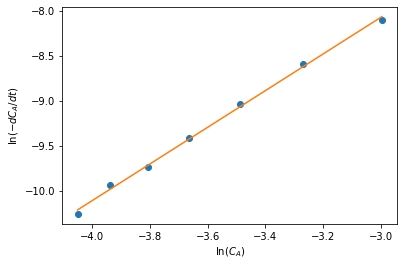

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import statsmodels.api as sm

# data will be a 2d list, which we convert to an array here
data = np.array(data)
t = data[:, 0]   # column 0
Ca = data[:, 1]  # column 1

# calculate numerical derivatives
tck = interpolate.splrep(t, Ca)
dCadt = interpolate.splev(t, tck, der=1)

# do the transformation
x = np.log(Ca)
y = np.log(-dCadt)

# setup and do the regression
# column of ones and x:  y = b + mx
X = np.column_stack([x, x**0])

mod = sm.OLS(y, X)
res = mod.fit()

intercept = res.params[1]
alpha = res.params[0]

confidence_intervals = res.conf_int(0.05)
intercept_error = confidence_intervals[1]
alpha_error = confidence_intervals[0]


print('alpha = {0}, conf interval {1}'.format(alpha, alpha_error))
print('k = {0}, conf interval {1}'.format(np.exp(intercept), 
                                          np.exp(intercept_error)))


# always visually inspect the fit
plt.plot(x, y,'o')
plt.plot(x, res.predict(X))
plt.xlabel('$\ln(C_A)$')
plt.ylabel('$\ln(-dC_A/dt)$')
plt.show()

In [0]:
res.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2210.
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           8.22e-08
Time:                        11:35:11   Log-Likelihood:                 13.785
No. Observations:                   7   AIC:                            -23.57
Df Residuals:                       5   BIC:                            -23.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0355      0.043     47.013      0.000       1.924       2.147
const         -1.9646      0.157    -12.539      0.000      -2.367      -1.562
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.377
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.735
Skew:                          -0.181   Prob(JB):                        0.692
Kurtosis:                       1.454   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


-   You can see there is a reasonably large range of values for the rate constant and reaction order (although the confidence interval does not contain zero)

-   The fit looks ok, but you can see the errors are not exactly random
    -   There seems to be systematic trends in a sigmoidal shape of the data
    -   That suggests small inadequacy in the model

-   Let us examine some methods of evaluating the quality of fit

-   First we examine the residuals, or the errors between the data and the model.

-   In a good fit, these will be randomly distributed

-   In a less good fit, there will be trends



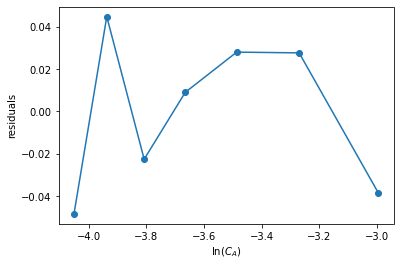

In [0]:
residuals = y - res.predict(X)

# always visually inspect the fit
plt.plot(x, residuals, 'o-')
plt.xlabel('$\ln(C_A)$')
plt.ylabel('residuals')
plt.show()



-   You can see there are trends in this data
    -   That means the model may not be complete

-   There is uncertainty in the data
    -   In each concentration measurement there is uncertainty in the time and value of concentration
    -   You need more data to reduce the uncertainty
    -   You may also need better data to reduce the uncertainty

-   Derivatives tend to *magnify* errors in data
    -   The method we used to fit the data contributed to the uncertainty

-   We also *nonlinearly* transformed the errors by taking logs and exp of the data and results, which may have skewed the confidence limits




## Nonlinear regression



-   Nonlinear models are abundant in reaction engineering
    -   $r = k C_A^n $ is linear in the $k$ parameter, and nonlinear in $n$

-   Nonlinear fitting is essentially a non-linear optimization problem

-   Unlike linear regression, where we directly compute the parameters using matrix algebra, we have to provide an initial guess and iterate to the solution

-   Similar to using fsolve, we must define a function of the model
    -   The function takes an independent variable, and parameters, f(x,a,b,&#x2026;)
    -   The function should return a value of $y$ for every value of $x$
    -   i.e. it should be vectorized

-   It is possible to formulate these problems as nonlinear minimization of summed squared errors. See [this example](http://jkitchin.github.io/blog/2013/02/18/Nonlinear-curve-fitting/).

-   The function [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) provides nonlinear fitting of models (functions) to data. 


Let's say we want to fit some other data to the function $$y=ax/(b+x)$$




Text(0, 0.5, 'y')

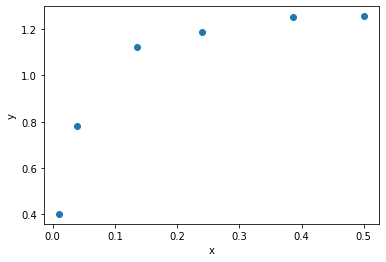

In [0]:
import numpy as np

x = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
y = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402])


plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

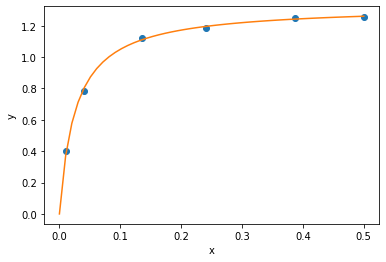

In [0]:
from scipy.optimize import curve_fit

def func(x, a, b):
    'nonlinear function in a and b to fit to data'
    return a * x / (b + x)

popt, pcov = curve_fit(func, x, y, p0=(-15,3))


xrange = np.linspace(0,0.5)
fitted_y = func(xrange, *popt)

plt.plot(x,y,'o')
plt.plot(xrange,fitted_y)

plt.xlabel('x')
plt.ylabel('y')


In [0]:
print(popt)

[1.328 0.026]


-   We also need to estimate uncertainties in nonlinear parameters

-   `lmfit` provides a nice way to do this

[lmfit](https://lmfit.github.io/lmfit-py/)

Read the [lmfit](https://lmfit.github.io/lmfit-py/) documentation to see how the confidence intervals are computed

Here is an example usage of lmfit.



In [0]:
!pip install lmfit

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 6
    # variables        = 2
    chi-square         = 6.9885e-04
    reduced chi-square = 1.7471e-04
    Akaike info crit   = -50.3470350
    Bayesian info crit = -50.7635160
[[Variables]]
    a:  1.32753139 +/- 0.00972276 (0.73%) (init = 2)
    b:  0.02646155 +/- 0.00102789 (3.88%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) =  0.711


Text(0, 0.5, 'y')

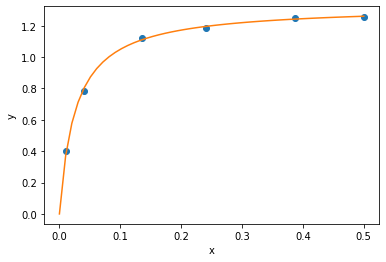

In [0]:
from lmfit import Model

gmodel = Model(func, independent_vars=['x'],param_names=['a','b'])
params = gmodel.make_params(a=2., b=1.0)
result = gmodel.fit(y, params, x=x)

print(result.fit_report())
xrange = np.linspace(0,0.5)

fitted_y = result.eval(x=xrange)


plt.plot(x,y,'o')
plt.plot(xrange,fitted_y)

plt.xlabel('x')
plt.ylabel('y')

-   Here the two intervals are relatively small, and do not include zero, suggesting both parameters are significant.

-   More importantly, the errors are not skewed by a nonlinear transformation.

-   Note you have to provide an initial guess.
    -   This will not always be easy to guess.
    -   There may be more than one minimum in the fit also, so different guesses may give different parameters.



# 06-262 Math Methods Recap

* Taught you methods needed to solve steady-state and non-steady-state problems.
* Concepts built on each other. Matrix algebra and the concept of eigenvalues and eigenvectors became important in solving systems of ODEs. Our understanding of $1^\circ$ ODEs helped us solve $2^\circ$ ODEs. Our understanding of ODEs helps solve PDEs. And homogeneous solutions help us solve non-homogeneous problems

### Linear Algebra Recap
\begin{align}
\arr{A} = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} \rightarrow 2\times 2 \text{ matrix}
\end{align}
* Allows us to use shorthand in defining linear systems of equations
\begin{align}
a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n = b_1\\
a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n = b_1\\
.\\.\\.\\
a_{m1}x_1 + a_{m2}x_2 + ... + a_{mn}x_n = b_m\\
\implies \arr{A}\vec{x} = \vec{b}
\end{align}
Which is homogneous when $\vec{b} \equiv \vec{0}$ and non-homogeneous when $\vec{b} \neq \vec{0}$
* We used Gauss Elimination to solve systems of equations.\
E.g.the system
\begin{align}
x_1 + 2x_2 - x_3 = 4\\
4x_2 - 2x_3 = -2\\
x_1 - 2x_2 + 3x_3 = 0
\end{align}
can be represented by
\begin{align}
\left[\begin{array}{rrr|r} 1 & 2 & -1 & 4\\
0 & 4 & -2 & -2 \\
1 & -2 & 3 & 0\end{array}\right] \rightarrow ^{\text{G.E.}}
\left[\begin{array}{rrr|r} 1 & 0 & 0 & 5\\
0 & 1 & 0 & -2 \\
0 & 0 & 1 & 3\end{array}\right]\\
\implies x_1 = 5, \ x_2 = -2, \ x_3 = 3
\end{align}

* Systems of equations can be
  1. underdetermined (m<n)
  2. determined (m=n)
  3. overdetermined (m>n)\
And can have 3 solution scenarios:
  1. infinite
  2. unique
  3. none\
Not dictated by how "determined" system is

* Determinants $\rightarrow$ important property to calculate
\begin{equation}
  |\arr{A}| = \det(\arr{A})=\begin{cases}
    a_{11} & \text{if $n=1$}.\\
    a_{11}A_{11} + a_{12}A_{12} + ... + a_{1n}A_{1n} & \text{if $n\neq 1$}.
  \end{cases}
\end{equation}
(only for square matrices) Here $A_{11}, \ A_{12}, \ A_{1n} ...$ are cofactors\
e.g. for a $2\times 2$ matrix, $\det(\arr{A}) = a_{11}a_{22} - a_{21}a_{12}$

* A matrix is singular (non-invertible) when the det. is zero

* Eigenvalues and eigenvectors\
For an $n\times n$ matrix $\arr{A}$, when $
\arr{A}\vec{x}=\lambda\vec{x}$, $\lambda$ is an eigenvalue and $\vec{x}$ is the corresponding eigenvector
  * $\lambda$'s found by solving $|\arr{A}-\lambda\arr{I}|=0$
  * corresponding $\vec{x}$ found by solving $(\arr{A}-\lambda\arr{I})\vec{x}=0$
  * the eigenspace of $\arr{A}$ is $\vec{x}=\vec{0}$ (always a solution) + all $\lambda,\vec{x}$ pairs
  * An $n\times n$ matrix yields $n$ $\lambda,\vec{x}$ pairs.

### ODE Recap

* We discussed several types of ODEs. Your ability to solve requires you to classify the ODE
  * these 5 classifications, together, will determine your solution method
1. Order\
Determined by the order of the highest derivative\
  A. first $\ y'=5$\
  B. second $\ y'' + y' + y = 5$
2. Seperable-ness
  * applies only to $1^\circ$ ODEs
  * can be written as $g(y)\cdot y'=f(x)$\
  A. separable $\ y^2\cdot y'= x + 2$\
  B. non-separable $\ y' + y = x$
3. Exactness
  * applies only to $1^\circ$ ODEs
  * can be written as $N(x,y)y'=M(x,y)$ with $\frac{\partial N}{\partial x} = \frac{\partial M}{\partial y}$\
  A. Exact $\ y\cdot y'=x^2$ (all separable ODEs are exact)\
  B. Non-exact $y\cdot y' = x^2 + y$
4. Linearity
  * can be written as $y''+p(x)y'+q(x)y=r(x)$ where $p,q$ and $r$ are continuous functions of $x$ only\
  A. Linear $\ y' + xy = 0$\
  B. Non-linear $\ y\cdot y' = x^2 + y$
5. Homogeneity
  * classification applies only to linear equations
  * occurs when $r(x) \equiv 0$\
  A. Homogeneous $y' + xy = 0$\
  B. Non-homogeneous $y'' + y = 5x$

#### Your Approach
1. If it is first order:\
  A. separate if possible\
  B. check linearity. If linear, make exact with integrating factor $F(x) = \exp[\int p(x)dx]$ and use chain rule to obtain $y(x) = e^{-\int p(x)dx}[\int F(x)r(x)dx + c]$\
  C. Write in form $M(x,y)dx+N(x,y)dy=0$, check for exactness.\
  If not exact, try to find integrating factor $F(x)$ or $F(y)$
  * If $F(x)$, then $\frac{1}{F}\frac{dF}{dx} = \frac{1}{N}\left\{\frac{\partial M}{\partial y} - \frac{\partial N}{\partial x}\right\} = R(x)$\
  and $F(x)=\exp[\int R(x)dx]$
  * If $F(y)$, then $\frac{1}{F}\frac{dF}{dy} = \frac{1}{M}\left\{\frac{\partial N}{\partial x} - \frac{\partial M}{\partial y}\right\} = R(y)$\
  and $F(y)=\exp[\int R(y)dy]$\
  Once your ODE is exact, find $u(x,y)$ s.t. $\frac{\partial u}{\partial x} = M(x,y)$ and $\frac{\partial u}{\partial y} = N(x,y)$\
  Implicit solution is given by $u(x,y)=c$
2. If it is second order:\
  A. check homogeneity. If homogeneous, identify the two component solution basis, which depends on the roots of the characteristic equation $\lambda^2+a\lambda+b=0$
  1. real, distinct roots\
  $y(x)=c_1e^{\lambda_1x}+c_2e^{\lambda_2x}$, where $\lambda=\frac{1}{2}(a\pm\sqrt{a^2-4b})$
  2. repeated roots\
  $y(x)=c_1e^{\lambda x}+c_2xe^{\lambda x}$ where $\lambda=-\frac{1}{2}a$
  3. complex roots\
  $y(x)=e^{-\frac{a}{2}x}[c_1\sin(\omega x)+c_2\cos(\omega x)]$ where $\omega=\sqrt{b-\frac{1}{4}a^2}$
  
  B. if non-homogeneous, find homogeneous solution $y_H(x)$, then find a particular solution $y_P(x)$ using either
  1. Method of undetermined coefficients
    * applicable only for non-homogeneous terms that return themselves as derivatives, e.g. $\sin x, e^x, x^n$
    * assume $y_P(x)$ looks like $r(x)$
  2. Variation of Parameters
    * works for any $r(x)$
    * assume $y_P(x)=u(x)y_1(x)+v(x)y_2(x)$
    * Find Wronskian, $W=y_1y_2'-y_2y_1'$, then,\
    $y(x)=y_H(x)+y_1(x)\int\frac{-r(x)y_2(x)}{W}dx + y_2(x)\int\frac{r(x)y_1(x)}{W}dx$

#### Coupled ODEs
e.g.\begin{align}
y_1'-y_1+y_2=4\\
y_2'+y_1=8x
\end{align}
especially when working with higher number of equations (like in chemical plant), best to solve simultaneously
* Matrices come back:
\begin{align}
\vec{y}'=\arr{A}\vec{y}+\vec{b}(x)
\end{align}
where $\vec{b}(x)$ is the non-homogeneous term, $\vec{y}$ is an $n\times 1$ vector of unknown functions and $\arr{A}$ is an $n\times n$ coefficient matrix\
For the example, $\arr{A}=\begin{bmatrix}1&-1 \\ -1&0 \end{bmatrix}$ and $\vec{b}=\begin{bmatrix} 4 \\ 8x \end{bmatrix}$
* We proved that the eigenvalues and eigenvectors of $\arr{A}$ yield the homogenoeus solution:
\begin{align}
\vec{y} = c_1\vec{x}^{(1)}e^{\lambda_1t} + c_2\vec{x}^{(2)}e^{\lambda_2t} + ... + c_n\vec{x}^{(n)}e^{\lambda_nt}
\end{align}
for real, distinct eigenvalues
* For real, repeated eigenvalues, we must use reduction of order to obtain linearly independent solutions\
e.g. $c_1\vec{x}^{(1)}e^{\lambda_1t} + c_2\vec{x}^{(1)}te^{\lambda_1t}$ (remember there is also a term from the solution of the generalized eigenvalue problem!)
* For complex eigenvalues, we must use Euler's formula
\begin{align}
e^{\omega it} = \cos(\omega t) + i\sin(\omega t)
\end{align}
to change basis and obtain a real solution
\begin{align}
\vec{y}=c_1 \begin{bmatrix} \cos\omega t \\ -sin\omega t \end{bmatrix} + c_2 \begin{bmatrix} \sin \omega t \\ \cos \omega t \end{bmatrix}
\end{align}
* Non-homogeneous systems are handled similarly to non-homogeneous single equations
  * after finding homogeneous solution, find a particular solution using MUC or VoP
  * In both cases, you assume a form of $y_P$\
  MUC: $\vec{y}_P(t) = \vec{u}\sin t + \vec{v}\cos t$ (for, say, $5\cos t$)\
      $\vec{y}_P(t) = \vec{u}t^2 + \vec{v}t + \vec{w}$ (for, say, $2t^2$)\
  VoP: $\vec{y}_P(t) = \arr{Y}(t)\vec{u}(t)$\
  where $\arr{Y}(t)$ is the fundamental matrix obtained from your two linearly independent solutions to homogeneous equation
* For non-linear ODE's where we can't get the solution, we can still find steady states and do a non-linear stability analysis
  * Steady states are straightforward $\vec{y}'=\vec{0}$, but you have to find **every steady state!**. Be careful. 
  * At each steady state, evaluate the jacobian and form a linearized ODE that holds near the steady state. 
  * Calculate the eigenvalues to understand the type (stability) of the steady state
* Boundary Value Problems
  * IVPs always have a unique solution provided continuity is met
  * BVPs have either no solution, unique or infinite number of solutions $\rightarrow$ you must think for these
* PDEs
  * 2 or more indeendent variables
  * solve using separation of variables
  * order, linearity, homogeneity



### Statistics 

At the very end, we covered some simple statistics that will help you next year. 
* Basic statistics
  * Types of distributions (continuous, discrete) and how to evaluate them (PDF, CDF, sampling) in python
  * Plotting distribution (**NOT JUST HISTOGRAMS**) and kernel density estimation. 
  * Fitting distributions based on the CDF
  * Estimates for properties of a Gaussian distribution, and the errors on those estimates
* Regression
  * Linear regression **[testable]**
    * Form the augmented matrix $\arr{X}$ with your non-linear functions
    * Solve for the best parameters using the $\arr{X}^T$ trick
    * If you need uncertainty, use a package like statsmodels
  * Non-linear regression
    * Turn a non-linear problem into a linear one, then solve like that
    * Use a tool like curvefit (easiest) or lmfit (if need uncertainty)
